<a href="https://colab.research.google.com/github/Wit5748/229352-StatisticalLearning/blob/main/Copy_of_229351_LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 1 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ **เมื่อเสร็จแล้วให้ทำการ share** จากนั้นส่ง link มาใน mango canvas

ในขั้นตอนแรก ขอให้ download ไฟล์ที่

http://donlapark.pages.dev/229351/data/housing.csv

In [ ]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/housing.csv

housing = pd.read_csv("housing.csv")

housing.head(10)

--2025-06-26 03:16:07--  http://donlapark.pages.dev/229351/data/housing.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/housing.csv [following]
--2025-06-26 03:16:07--  https://donlapark.pages.dev/229351/data/housing.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2025-06-26 03:16:07 (23.2 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Basic data exploration

In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Which variable has missing data?

In [ ]:
housing = housing.dropna()

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exercise 1

1. Download ไฟล์ข้อมูลที่
  http://donlapark.pages.dev/229351/data/Advertising.csv
  ซึ่งเป็นข้อมูลของผลการขายสินค้าอย่างหนึ่ง (Sales) กับการโฆษณาผ่านทาง TV, Radio, Newspaper
2. สร้าง dataframe ชื่อว่า **Ads** โดยใช้ข้อมูลชุดนี้
3. ดูข้อมูล 5 แถวแรกของ `Ads`
4. ตรวจสอบว่ามีข้อมูลที่หายไปหรือไม่
5. แสดงค่าสถิติพรรณนา (Descriptive statistics) ของตัวแปรต่างๆ

In [ ]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/Advertising.csv

Ads = pd.read_csv("housing.csv")

Ads.head(5)

--2025-06-26 03:19:37--  http://donlapark.pages.dev/229351/data/Advertising.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/Advertising.csv [following]
--2025-06-26 03:19:37--  https://donlapark.pages.dev/229351/data/Advertising.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3870 (3.8K) [text/csv]
Saving to: ‘Advertising.csv.4’

Advertising.csv.4   100%[===================>]   3.78K  --.-KB/s    in 0s      

2025-06-26 03:19:37 (47.7 MB/s) - ‘Advertising.csv.4’ saved [3870/3870]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
Ads.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Your answers here:

## Calling, indexing & modifying dataframes

In [ ]:
# calling a column

housing['ocean_proximity']

`ocean_proximity` is categorical. Let's count its values.

In [ ]:
housing["ocean_proximity"].value_counts()

## Basic statistics of a variable

In [ ]:
print("Mean: ",housing["total_rooms"].mean())
print("Standard deviation: ",housing["total_rooms"].std())
print("Maximum: ",housing["total_rooms"].max())
print("Minimum: ",housing["total_rooms"].min())

In [ ]:
housing[["longitude", "latitude", "housing_median_age"]]

,longitude,latitude,housing_median_age
0,-122.23,37.88,41.0
1,-122.22,37.86,21.0
2,-122.24,37.85,52.0
3,-122.25,37.85,52.0
4,-122.25,37.85,52.0
...,...,...,...
20635,-121.09,39.48,25.0
20636,-121.21,39.49,18.0
20637,-121.22,39.43,17.0
20638,-121.32,39.43,18.0


In [ ]:
housing.loc[0]

,0
longitude,-122.23
latitude,37.88
housing_median_age,41.0
total_rooms,880.0
total_bedrooms,129.0
population,322.0
households,126.0
median_income,8.3252
median_house_value,452600.0
ocean_proximity,NEAR BAY


## Extracting a subset of dataframe

In [ ]:
housing.loc[1:3,["longitude","latitude"]]

,longitude,latitude
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85


In [ ]:
housing.iloc[-1]

,20639
longitude,-121.24
latitude,39.37
housing_median_age,16.0
total_rooms,2785.0
total_bedrooms,616.0
population,1387.0
households,530.0
median_income,2.3886
median_house_value,89400.0
ocean_proximity,INLAND


## Selecting rows based on conditions

In [ ]:
housing[(housing['longitude']>-122) & (housing['latitude']>=40)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,INLAND
3345,-121.11,41.07,26.0,1707.0,308.0,761.0,250.0,2.7188,48100.0,INLAND
3346,-120.96,41.12,29.0,779.0,136.0,364.0,123.0,2.5000,59200.0,INLAND
3347,-121.07,40.85,17.0,976.0,202.0,511.0,175.0,3.6641,80800.0,INLAND
3348,-120.38,40.98,27.0,777.0,185.0,318.0,115.0,1.6833,40000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,43500.0,INLAND
18824,-121.93,41.86,28.0,4225.0,835.0,1908.0,686.0,1.7400,44000.0,INLAND
18858,-121.76,41.50,31.0,602.0,153.0,112.0,47.0,1.0667,34200.0,INLAND
19735,-121.80,40.34,26.0,4815.0,910.0,1341.0,539.0,2.8810,79800.0,INLAND


In [ ]:
housing[housing['latitude']>=40]

## Exercise 2

ในข้อต่อไปนี้ ให้นับแถวและคอลัมน์เริ่มจาก 0
1. แสดงค่าสูงสุดของข้อมูลที่อยู่ในแถวที่ 200-400 ของตัวแปร `total_bedrooms`
2. แสดง 3 คอลัมน์สุดท้ายของพื้นที่ที่มีจำนวนห้องนอน (`total_bedrooms`) มากกว่า 900 ห้อง

In [ ]:
p = housing.loc[200:400]
p

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
200,-122.23,37.78,52.0,862.0,215.0,994.0,213.0,3.0257,80800.0,NEAR BAY
201,-122.22,37.78,50.0,1920.0,530.0,1525.0,477.0,1.4886,128800.0,NEAR BAY
202,-122.23,37.78,43.0,1420.0,472.0,1506.0,438.0,1.9338,112500.0,NEAR BAY
203,-122.23,37.78,52.0,986.0,258.0,1008.0,255.0,1.4844,119400.0,NEAR BAY
204,-122.23,37.78,44.0,2340.0,825.0,2813.0,751.0,1.6009,118100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
396,-122.29,37.89,52.0,3171.0,698.0,1498.0,696.0,3.1795,218200.0,NEAR BAY
397,-122.29,37.88,50.0,1211.0,261.0,523.0,227.0,3.8672,216700.0,NEAR BAY
398,-122.29,37.89,52.0,979.0,175.0,374.0,153.0,5.1675,270600.0,NEAR BAY
399,-122.29,37.89,52.0,2269.0,380.0,1004.0,371.0,5.1696,261400.0,NEAR BAY


In [ ]:
p["total_bedrooms"].max()

2048.0

In [ ]:
morethan900 = housing[(housing['total_bedrooms']>= 900)]
morethan900.iloc[-3:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20569,-121.76,38.66,17.0,5320.0,984.0,2866.0,928.0,4.1997,133400.0,INLAND
20603,-121.54,39.13,18.0,4289.0,1021.0,2707.0,939.0,1.3375,59600.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND


## Plotting

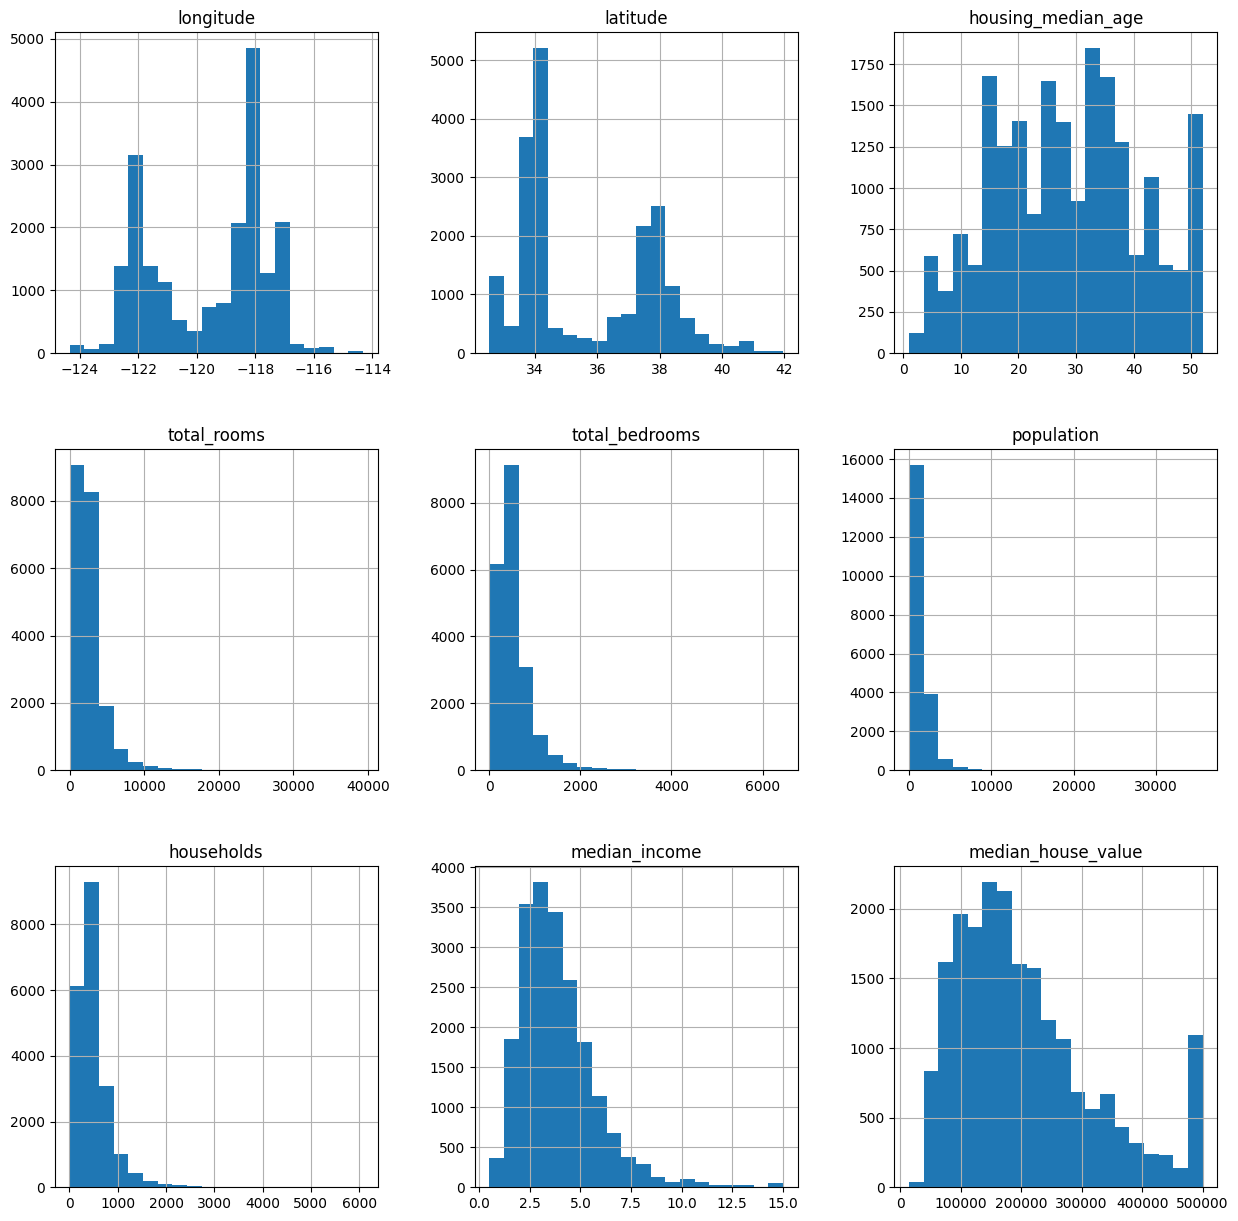

In [ ]:
housing.hist(bins=20, figsize=(15,15))
plt.show()

In [ ]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


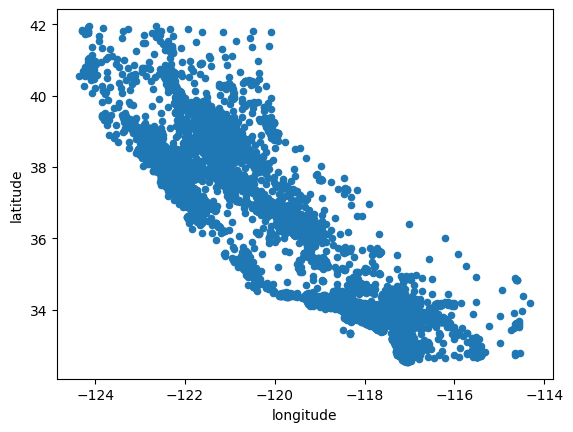

In [ ]:
housing.plot.scatter(x="longitude", y="latitude");

In [ ]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.1)

In [ ]:
corr_matrix = housing.corr()

corr_matrix

### Grouping

พิจารณา Anscombe dataset ข้างล่างนี้

In [ ]:
import seaborn as sns

df = sns.load_dataset('anscombe')

In [ ]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [ ]:
groups = df.groupby('dataset')

In [ ]:
group_one = groups.get_group('I')
group_one

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [ ]:
group_two = groups.get_group('II')
group_two

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


In [ ]:
group_te = groups.get_group('III')
group_te

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [ ]:
group_fo = groups.get_group('IV')
group_fo

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


## Exercise 3

1. คำนวณค่า mean, standard deviation และ correlation matrix ของแต่ละกลุ่ม
2. สร้าง scatter plot ของแต่ละกลุ่มด้วย `groups.plot.scatter(...)`
3. จากข้อ 1 และข้อ 2 จงบอกว่าการศึกษาค่า summary statistics (mean, s.d., correlation) อย่างเดียวเพียงพอกับการศึกษาข้อมูลชุดหนึ่งหรือไม่ เพราะเหตุใด

In [ ]:
me = df.groupby('dataset').mean()
me

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [ ]:
st = df.groupby('dataset').std()
st

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [ ]:
g = df.groupby('dataset').corr()
g

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

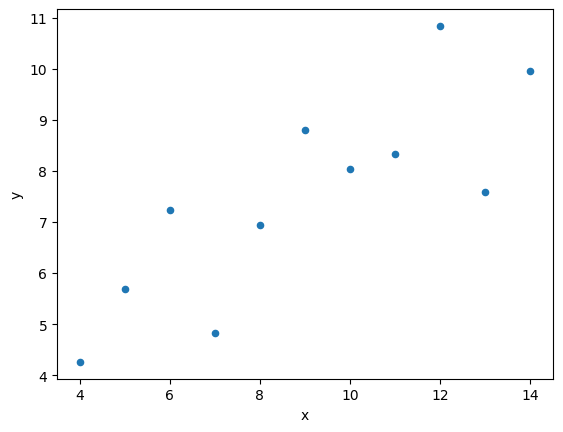

In [ ]:
group_one.plot.scatter('x', 'y');

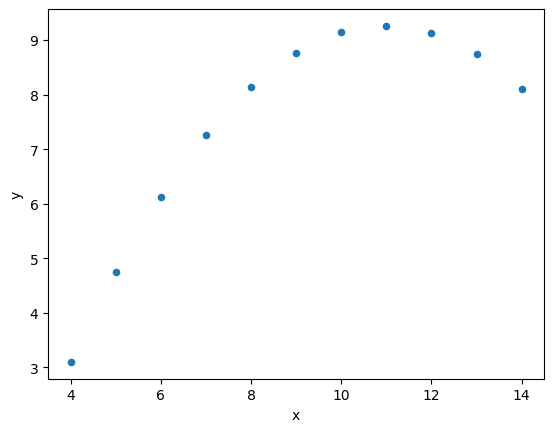

In [ ]:
group_two.plot.scatter('x', 'y');

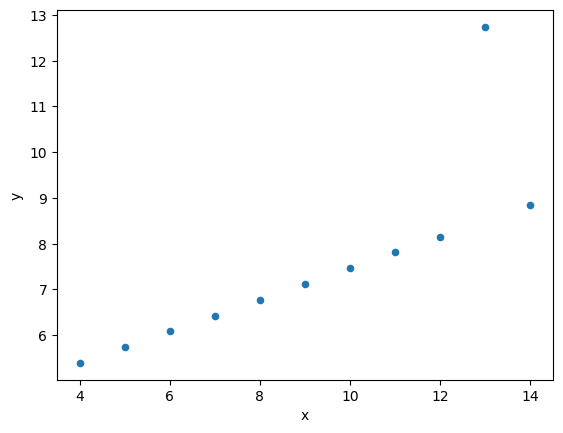

In [ ]:
group_te.plot.scatter('x', 'y');

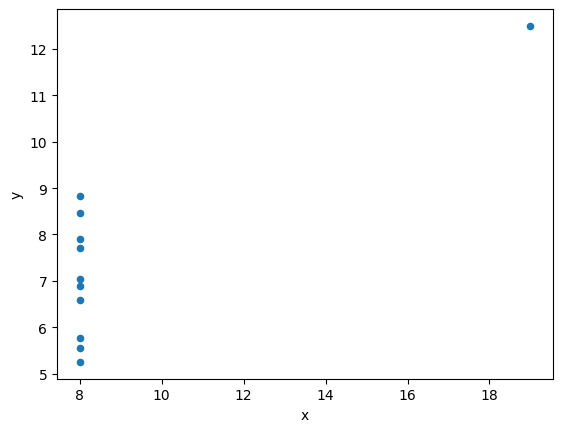

In [ ]:
group_fo.plot.scatter('x', 'y');

จากข้อ 1 และข้อ 2 ไม่เพียงพอต่อการศึกษาเนื่องจากข้อมูลน้อยเกินไป